<b> Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<b> Loading the Dataset

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b> Dropping unwanted columns

In [3]:
data.drop( columns = ['PassengerId','Cabin','Name'], inplace= True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [4]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [5]:
data.dropna(inplace= True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Ticket    712 non-null    object 
 7   Fare      712 non-null    float64
 8   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 55.6+ KB


In [7]:
data.shape

(712, 9)

In [8]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [9]:
data.duplicated().sum()

3

<b>Dropping duplicates

In [10]:
data.drop_duplicates (inplace = True)
data.duplicated().sum()

0

In [11]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,382652,29.1250,Q
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
889,1,1,male,26.0,0,0,111369,30.0000,C


#### No; of male passesngers survived and is  above 30

In [12]:
male_survived30 = data.query("  Sex == 'male' & Age >30 & Survived == 1 ")

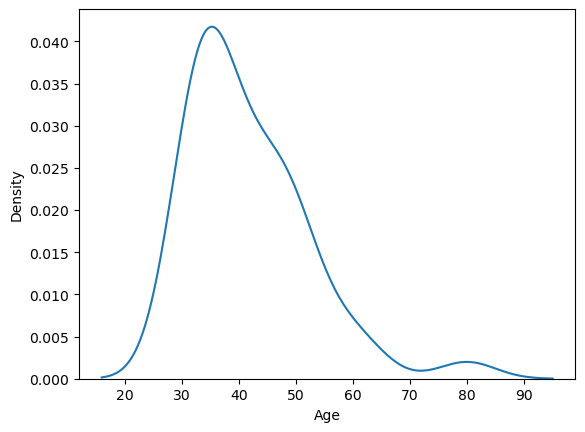

In [13]:
sns.kdeplot(data = male_survived30 , x = 'Age')
plt.show()

In [14]:
male_survived30.mean()

Survived     1.000000
Pclass       1.525000
Age         41.725000
SibSp        0.325000
Parch        0.125000
Fare        61.688235
dtype: float64

In [15]:
female_survived50 = data.query ( " Sex == 'female' & Age >50 & Survived == 1")
female_survived50

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
11,1,1,female,58.0,0,0,113783,26.5500,S
15,1,2,female,55.0,0,0,248706,16.0000,S
195,1,1,female,58.0,0,0,PC 17569,146.5208,C
268,1,1,female,58.0,0,1,PC 17582,153.4625,S
275,1,1,female,63.0,1,0,13502,77.9583,S
366,1,1,female,60.0,1,0,110813,75.2500,C
483,1,3,female,63.0,0,0,4134,9.5875,S
496,1,1,female,54.0,1,0,36947,78.2667,C
513,1,1,female,54.0,1,0,PC 17603,59.4000,C
571,1,1,female,53.0,2,0,11769,51.4792,S


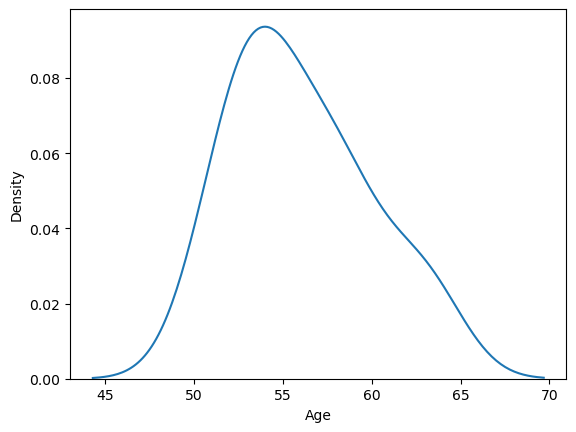

In [16]:
sns.kdeplot( data = female_survived50 , x = 'Age')
plt.show()

In [17]:
female_survived50.mean()

Survived     1.000000
Pclass       1.266667
Age         56.066667
SibSp        0.666667
Parch        0.400000
Fare        70.023887
dtype: float64

In [18]:
 malefemale_survived = data.query("Survived == 1" )
malefemale_survived

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
8,1,3,female,27.0,0,2,347742,11.1333,S
9,1,2,female,14.0,1,0,237736,30.0708,C
...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,2667,7.2250,C
879,1,1,female,56.0,0,1,11767,83.1583,C
880,1,2,female,25.0,0,1,230433,26.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S


In [19]:
palette_color = sns.color_palette ('dark')
###plt.pie(data = malefemale_survived , x = data.Pclass.value_counts(), explode = [1,0],\
        ###colors = palette_color, labels = [1 ,2 ,3], autopct = '%0.2%%');


In [20]:
malefemale_survived.groupby( ['Pclass']) ['Sex'].value_counts()

Pclass  Sex   
1       female    79
        male      40
2       female    68
        male      15
3       female    46
        male      37
Name: Sex, dtype: int64

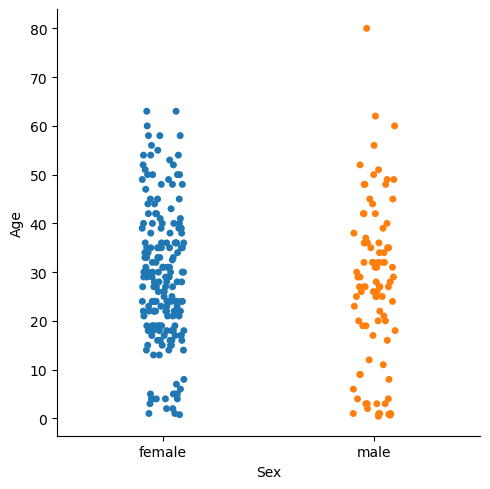

In [21]:
sns.catplot(data = malefemale_survived , x = 'Sex' , y = 'Age' )
plt.show()

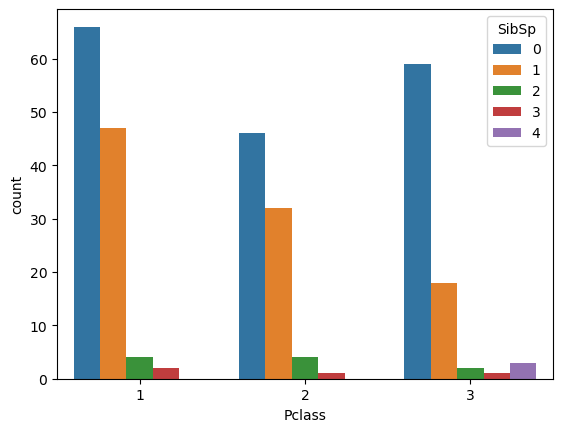

In [35]:
sns.countplot( data = malefemale_survived , x= 'Pclass', hue= 'SibSp'   )
plt.show()

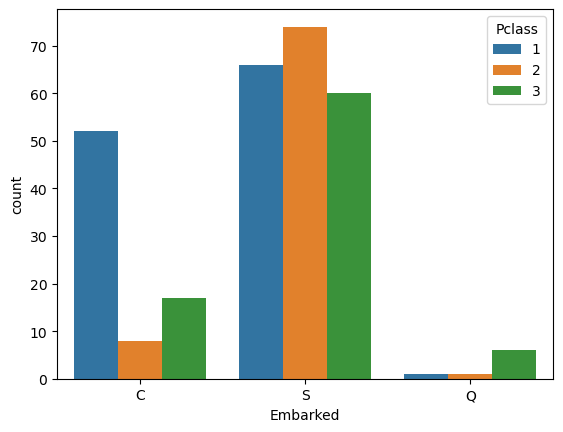

In [27]:
sns.countplot( data = malefemale_survived , x= 'Embarked'  , hue = 'Pclass')
plt.show()

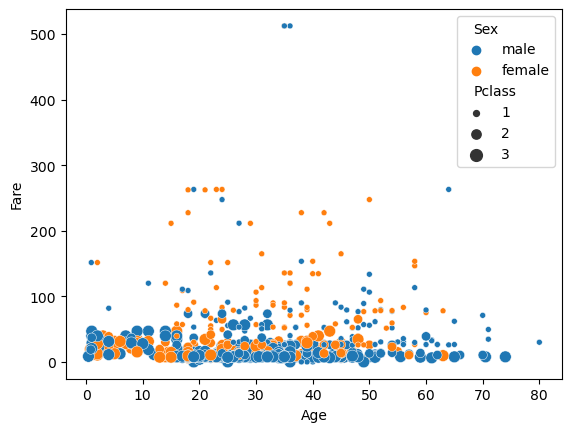

In [49]:
sns.scatterplot( data = data , x = 'Age', y = 'Fare' , hue ='Sex', size = 'Pclass')
plt.show()

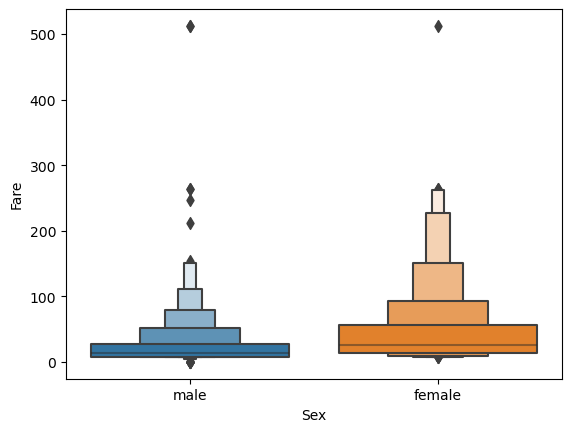

In [52]:
sns.boxenplot ( data= data , x = 'Sex' , y = 'Fare')
plt.show()